In [8]:
#Import Libraries


import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
#Read xls File and Load to a dataframe

df = pd.read_excel('Hclean_weather2015_2020.xlsx')
#print(df)
df = df.drop(columns = df.columns[15:])
df = df.drop(columns = df.columns[0:2])
df = df.dropna()
df

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
0,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74,24.4
1,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56,19.4
2,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74,25.6
3,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74,29.4
4,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83237,Hemlock,2020-07-13 08:30:00,2020-07-13,08:30:00,1001.95,23.088,87.8,21.0,0.0,0.00,95.5,0.00,11.9
83238,Hemlock,2020-07-13 09:00:00,2020-07-13,09:00:00,1001.85,23.545,83.8,20.7,0.0,0.00,95.5,0.56,14.4
83239,Hemlock,2020-07-13 09:30:00,2020-07-13,09:30:00,1001.75,24.436,82.3,21.2,0.0,0.00,95.5,0.37,21.9
83240,Hemlock,2020-07-13 10:00:00,2020-07-13,10:00:00,1001.85,25.137,79.2,21.3,0.0,0.00,96.9,0.56,29.4


In [10]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)
#df["Date"] = pd.to_datetime(df["Date"]).dt.date
#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)
df.describe()

,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
count,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000
mean,1010.415702,10.989395,76.707740,6.790404,0.096078,0.294818,190.360723,1.011158,14.371051
std,8.136720,9.843465,19.456583,10.539974,8.070332,0.513440,102.639265,1.298407,35.127193
min,660.050000,-24.709000,14.700000,-28.700000,0.000000,0.000000,0.000000,0.000000,0.600000
25%,1005.450000,3.063000,62.125000,-1.200000,0.000000,0.000000,103.900000,0.000000,0.600000
50%,1010.450000,11.953000,80.100000,7.900000,0.000000,0.000000,220.400000,0.560000,0.600000
75%,1015.550000,18.771000,94.500000,15.700000,0.000000,0.370000,280.800000,1.480000,16.900000
max,1038.550000,34.308000,100.000000,27.500000,1040.380000,47.310000,355.200000,46.760000,1275.600000


In [11]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2015_2019 = pd.concat([df2015,df2016,df2017,df2018])
df2015_2019

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
0,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74,24.4
1,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56,19.4
2,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74,25.6
3,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74,29.4
4,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49673,Hemlock,2018-04-30 21:30:00,2018-04-30,21:30:00,1008.95,7.845,79.5,4.5,0.0,0.19,331.3,0.93,0.6
49674,Hemlock,2018-04-30 22:00:00,2018-04-30,22:00:00,1008.85,6.914,81.9,4.0,0.0,0.37,99.7,0.93,0.6
49675,Hemlock,2018-04-30 22:30:00,2018-04-30,22:30:00,1008.95,6.661,85.5,4.4,0.0,0.00,123.5,0.37,0.6
49676,Hemlock,2018-04-30 23:00:00,2018-04-30,23:00:00,1008.85,5.719,87.8,3.9,0.0,0.19,122.1,0.74,0.6


/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_24051/577814791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_24051/577814791.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

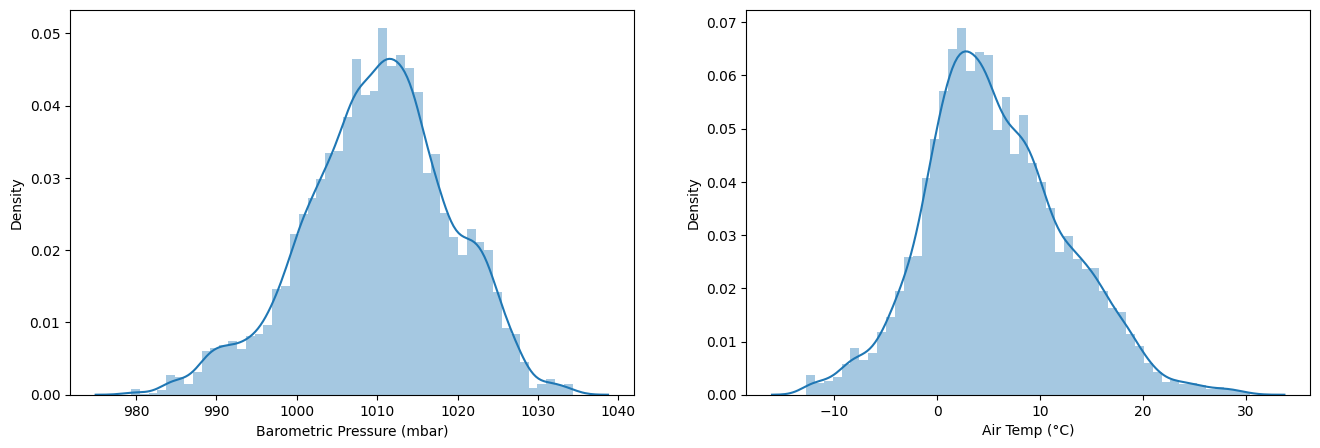

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.show()

<Axes: >

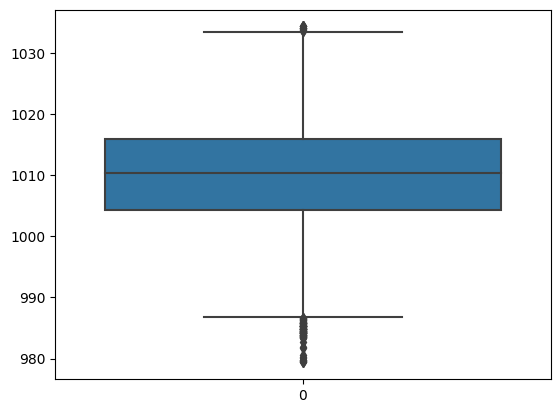

In [13]:
sns.boxplot(df2015_2019['Barometric Pressure (mbar)'].values)

<Axes: >

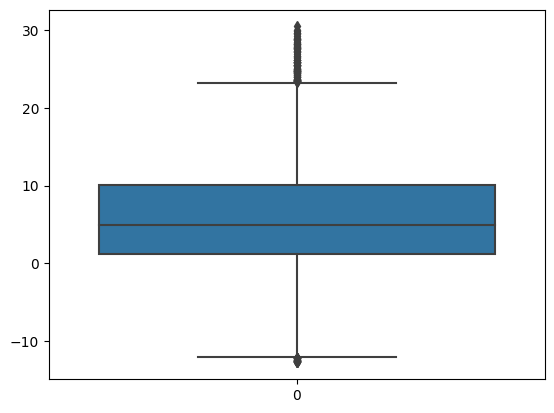

In [14]:
sns.boxplot(df2015_2019['Air Temp (°C)'].values)

### Delet Outlier for Air Temp (°C)

In [15]:
#Finding the IQR
percentile25 = df2015_2019['Air Temp (°C)'].quantile(0.25)
percentile75 = df2015_2019['Air Temp (°C)'].quantile(0.75)

In [16]:
#Finding the upper and lower limits
IQR = percentile75 -percentile25
upper_limit = percentile75 + (1.5 * IQR)
lower_limit = percentile25 - (1.5 * IQR)

In [17]:
#Step-7: Finding outliers
df2015_2019[df2015_2019['Air Temp (°C)'] > upper_limit]
df2015_2019[df2015_2019['Air Temp (°C)'] < lower_limit]

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
29509,Hemlock,2017-03-05 01:00:00,2017-03-05,01:00:00,1027.95,-12.123,40.3,-22.9,0.0,0.74,315.9,2.97,0.6
29510,Hemlock,2017-03-05 01:30:00,2017-03-05,01:30:00,1028.05,-12.196,41.2,-22.7,0.0,0.56,335.5,2.23,0.6
29511,Hemlock,2017-03-05 02:00:00,2017-03-05,02:00:00,1028.05,-12.417,41.6,-22.8,0.0,0.19,306.1,1.67,0.6
29512,Hemlock,2017-03-05 02:30:00,2017-03-05,02:30:00,1027.95,-12.454,41.8,-22.8,0.0,0.37,311.7,1.86,0.6
29513,Hemlock,2017-03-05 03:00:00,2017-03-05,03:00:00,1027.75,-12.565,41.9,-22.8,0.0,0.74,292.0,2.41,0.6
29514,Hemlock,2017-03-05 03:30:00,2017-03-05,03:30:00,1027.65,-12.751,41.9,-23.0,0.0,0.56,289.2,2.04,0.6
29515,Hemlock,2017-03-05 04:00:00,2017-03-05,04:00:00,1027.85,-12.676,42.3,-22.8,0.0,0.37,251.3,1.67,0.6
29516,Hemlock,2017-03-05 04:30:00,2017-03-05,04:30:00,1028.15,-12.602,42.1,-22.8,0.0,0.56,280.8,1.48,0.6
29517,Hemlock,2017-03-05 05:00:00,2017-03-05,05:00:00,1028.15,-12.565,42.0,-22.8,0.0,0.74,320.1,2.41,0.6
29518,Hemlock,2017-03-05 05:30:00,2017-03-05,05:30:00,1028.15,-12.565,43.0,-22.5,0.0,0.74,306.1,2.04,0.6


In [18]:
#Step-8: Trimming outliers
new_df_2015_2019 = df2015_2019[ df2015_2019['Air Temp (°C)']>lower_limit]
new_df_2015_2019 = new_df_2015_2019[new_df_2015_2019['Air Temp (°C)']<upper_limit]
new_df_2015_2019.shape

(8985, 13)

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_24051/718597567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Air Temp (°C)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_24051/718597567.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_2015_

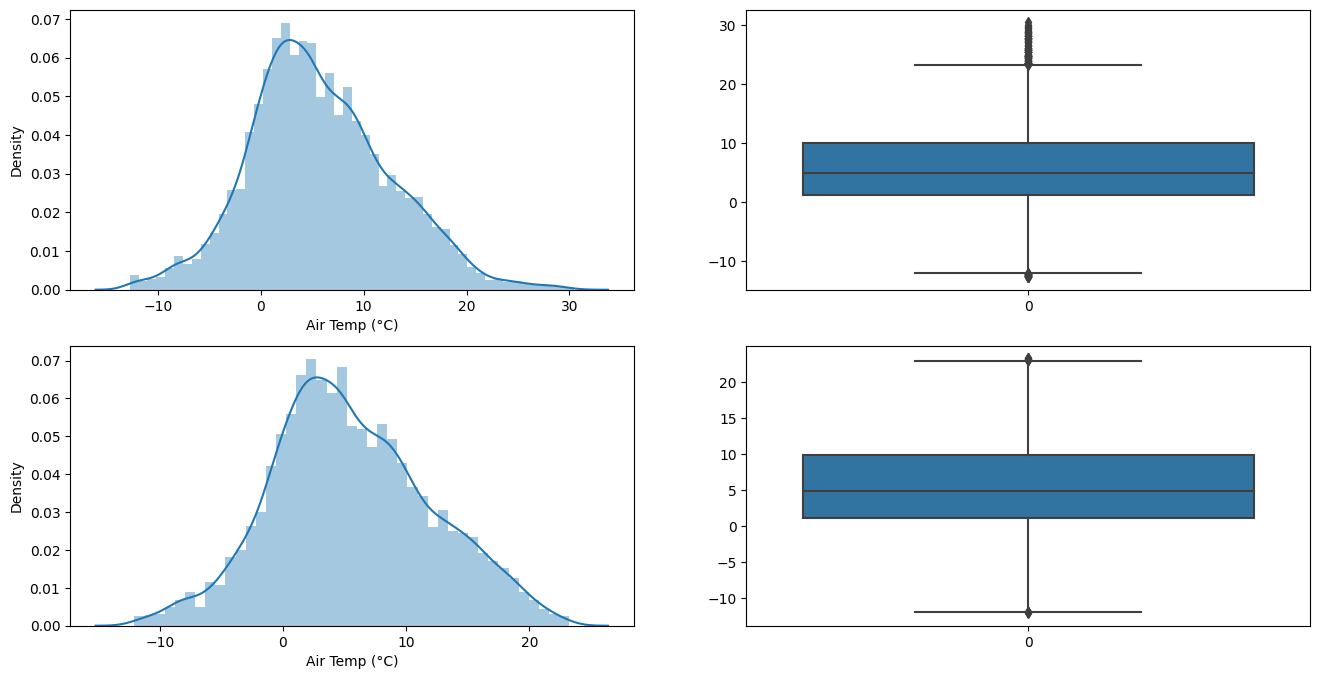

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2015_2019['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2015_2019['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2015_2019['Air Temp (°C)'].values)
plt.show()

### Case 2-'Barometric Pressure (mbar)'

0.0031790226349911466
42.87599400074964


Text(0, 0.5, 'Air Temp (°C)')

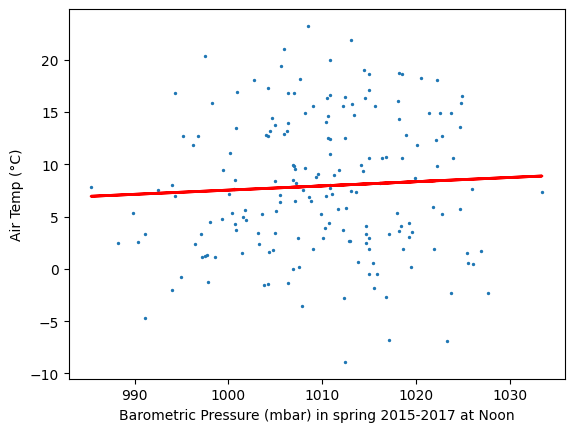

In [20]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon['Barometric Pressure (mbar)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(pre15_17,temp15_17_noon, s=2)
plt.plot(pre15_17, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

-0.024485235154440232
49.92092810815686


(array([ 980.,  990., 1000., 1010., 1020., 1030.]),
 [Text(980.0, 0, '980'),
  Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030')])

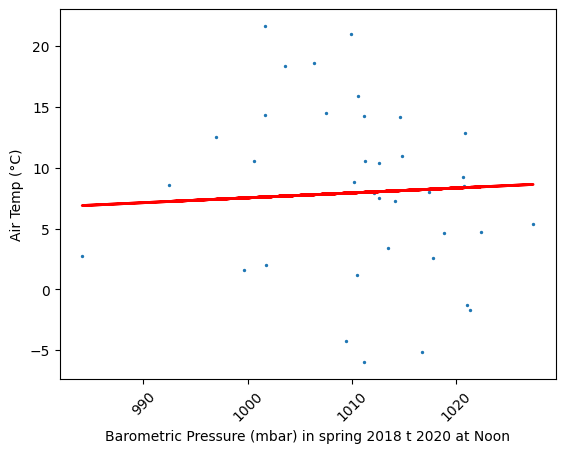

In [21]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = df2019[df2019["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Barometric Pressure (mbar)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2018 t 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


### Case 1: Date

0.12776765364410503
37.517096548742735


Text(0, 0.5, 'Air Temp (°C)')

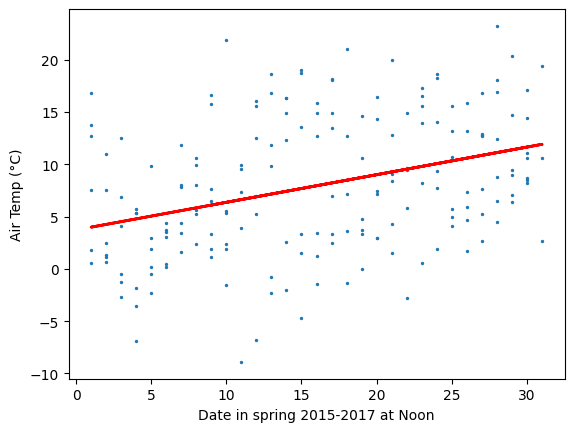

In [22]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_17_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)
#list to store number of predictor variables
predictors=[]

#list to store model scores
MSE_scores=[]
R2_scores=[]

MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

predictors.append(1)
MSE_scores.append(MSE)
R2_scores.append(R2)
plt.scatter(date15_19_noon,temp15_17_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.2746810122886997
35.343210227484164


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

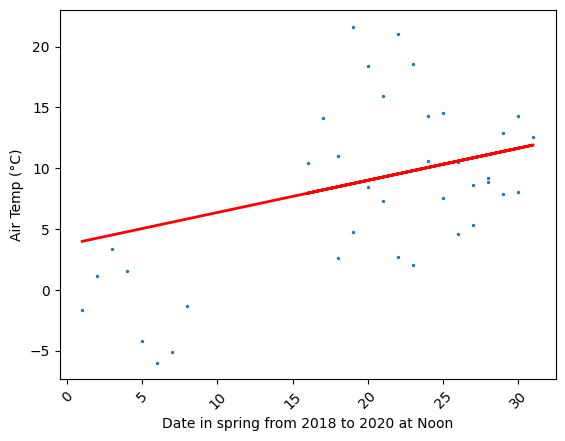

In [23]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = df2019[df2019["Time"]== '12:00:00']

date2020_noon = df2020_noon['Date']
temp2020_noon = df2020_noon['Air Temp (°C)']

date2020_noon = date2020_noon.astype(str)
date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)

date2020_noon = date2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(date2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(date2020_noon, temp2020_noon, s = 2)
plt.plot(date2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3- Gust Speed (m/s)

0.02017105176992673
42.145120397772395


Text(0, 0.5, 'Air Temp (°C)')

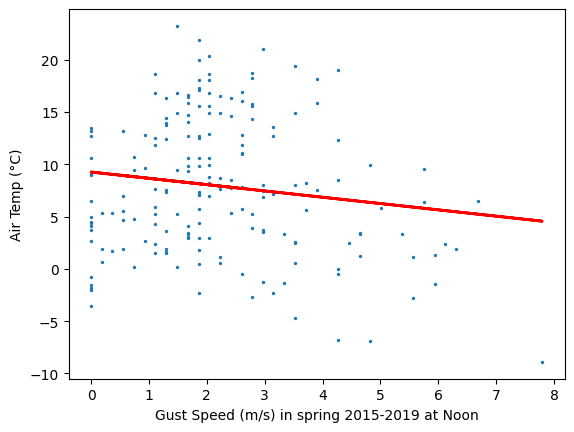

In [24]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed15_19 = df15_19_noon['Gust Speed (m/s)']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(gSpeed15_19,temp15_19_noon, s=2)
plt.plot(gSpeed15_19, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

0.04840763902283374
46.36901754221096


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

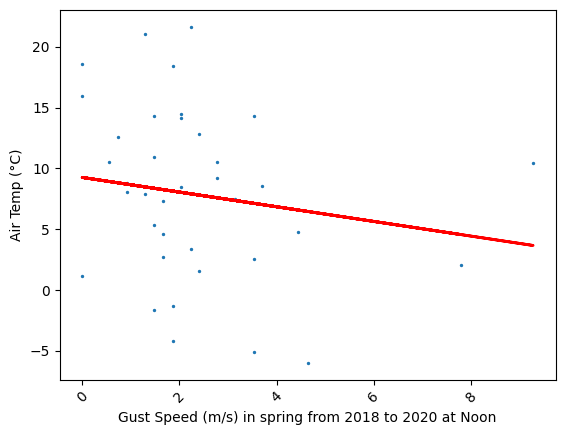

In [25]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed2020_noon = df2020_noon['Gust Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed2020_noon = gSpeed2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2020_noon, temp2020_noon, s = 2)
plt.plot(gSpeed2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 : Barometric Pressure (mbar) and Gust Speed (m/s)

In [26]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed_BP_15_19 = df15_19_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed_BP_15_19 = gSpeed_BP_15_19.to_numpy().reshape(-1,2)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed_BP_15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed_BP_15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.022303757845508643
42.05338688194719


In [27]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed_BP_2020_noon = df2020_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed_BP_2020_noon = gSpeed_BP_2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed_BP_2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.028304163449640818
47.348616002370484


### Case 5: Barometric Pressure (mbar), Gust Speed (m/s), Wind Speed (m/s)

In [28]:
# plot linear regression

df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,3)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

0.03627095252688861
41.4526196740287


In [29]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,3)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.055212738450006515
46.0374199089649


### Wind speed and Barometric Pressure


In [30]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

WSpeed_BP_15_19 = df15_19_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
wSpeed_BP_15_19 = WSpeed_BP_15_19.to_numpy().reshape(-1,2)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(WSpeed_BP_15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(WSpeed_BP_15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.011741645500802811
42.507692194345346


In [31]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

wSpeed_BP_2020_noon = df2020_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

wSpeed_BP_2020_noon = wSpeed_BP_2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(wSpeed_BP_2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

-0.010853270605979848
49.2566722469252


/Users/kegind/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Drew Point


0.42576147536596476
24.699568023027926


Text(0, 0.5, 'Air Temp (°C)')

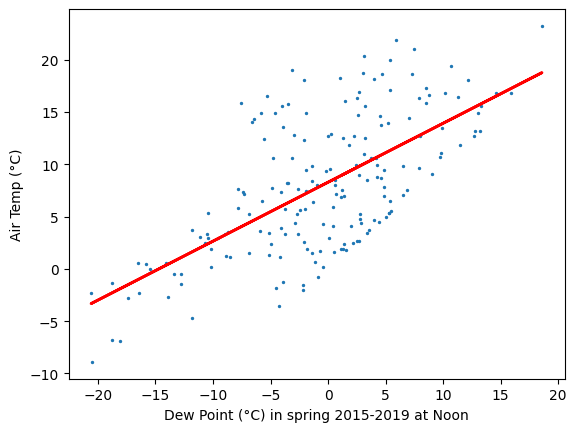

In [32]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

dPoint15_19 = df15_19_noon['Dew Point (°C)']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
dPoint15_19 = dPoint15_19.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dPoint15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(dPoint15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(dPoint15_19,temp15_19_noon, s=2)
plt.plot(dPoint15_19, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

0.6721755724413692
15.974168410328565


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 [Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

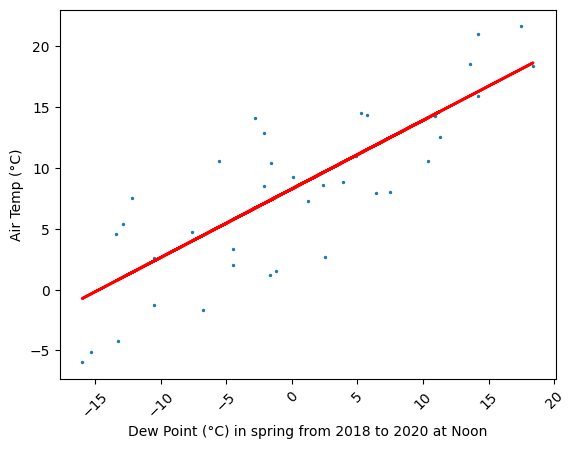

In [33]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

dPoint2020_noon = df2020_noon['Dew Point (°C)']
temp2020_noon = df2020_noon['Air Temp (°C)']

dPoint2020_noon = dPoint2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(dPoint2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(dPoint2020_noon, temp2020_noon, s = 2)
plt.plot(dPoint2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)